In [2]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import textwrap

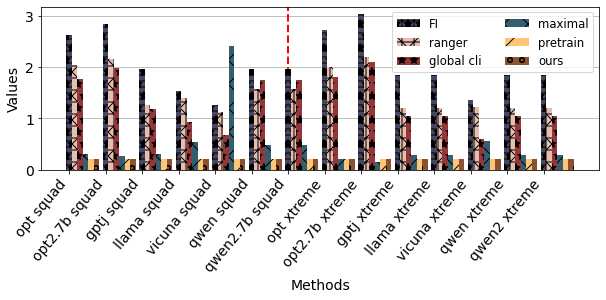

In [143]:
data = pd.read_excel('data/sigfigdata.xlsx')
data.rename(columns = {'Unnamed: 0': 'methods'}, inplace = True)
# print(data.columns)

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,3))

bar_width = 0.15
r1 = np.arange(len(data))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

# Create bars with different colors
plt.bar(r1, data['FI'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
plt.bar(r3, data['global cli'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
plt.bar(r4, data['maximal'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
plt.bar(r5, data['pretrain'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow

plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
plt.xlabel('Methods')
plt.ylabel('Values')
# plt.title('Compare Different Methods')
plt.xticks(range(len(data.methods)), data.methods, rotation=50, ha='right')

target_idx = data.methods.tolist().index('qwen2.7b squad')
plt.axvline(x=target_idx, color='red', linestyle='--', linewidth=2, ymin=0, ymax=1)
plt.grid(True,axis='y')
plt.savefig('figs/single.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

In [133]:
data

,methods,FI,ranger,global cli,maximal,pretrain,ours
0,opt squad,2.62,2.04,1.76,0.31,0.2,0.2
1,opt2.7b squad,2.85,2.16,1.98,0.27,0.2,0.2
2,gptj squad,1.96,1.26,1.18,0.30,0.2,0.2
3,llama squad,1.54,1.40,0.92,0.53,0.2,0.2
4,vicuna squad,1.26,1.13,0.67,2.41,0.2,0.2
5,qwen squad,1.96,1.58,1.75,0.48,0.2,0.2
6,qwen2.7b squad,1.96,1.58,1.75,0.48,0.2,0.2
7,opt xtreme,2.72,2.00,1.80,0.21,0.2,0.2
8,opt2.7b xtreme,3.03,2.20,2.10,0.15,0.2,0.2
9,gptj xtreme,1.84,1.20,1.05,0.29,0.2,0.2


## Fig 6

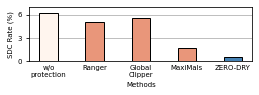

In [27]:
data = pd.read_excel('data/fig6-methodscomparison.xlsx')
data = data.rename(columns={'Unnamed: 0': 'Methods', 'SDC rate (%)': 'Values'})

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(4, 1))

bar_width = 0.4
# r1 = np.arange(len(data))
r1 = np.arange(len(data)) * 1

# 768cce, f9c676
colors = ['seashell', 'darksalmon', 'darksalmon', 'darksalmon', '#4682B4']
plt.bar(r1, data.Values, width=bar_width, edgecolor='black', linewidth=1, color=colors, zorder=5)  # Yellow

# plt.legend(data, loc='upper right', fontsize='small', ncol=2)
plt.xlabel('Methods')
plt.ylabel('SDC Rate (%)')
labels = data.Methods.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:2]) for label in labels]
plt.xticks(r1, labels_wrapped, ha='center')
# plt.xticks(range(len(data)), data.Methods, rotation = 25,ha='right')
plt.yticks([0, 3, 6])
plt.ylim(0,7)
plt.grid(True,axis='y')
plt.tick_params(axis='x', length=0)
plt.savefig('figs/fig6-methodscomparison.pdf',dpi=100,bbox_inches = 'tight')

plt.show()
# data

## Fig 7

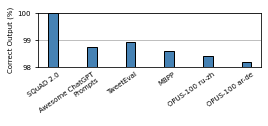

In [598]:
data = pd.read_excel('data/fig7-alternativebounds.xlsx')
data = data.rename(columns={'Unnamed: 0': 'Methods', 'Recall (%)': 'Recall'})

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(4, 1))

# bar_width = 0.42
# r1 = np.arange(len(data))

r1 = np.arange(len(data)) * 1

plt.bar(r1, data['Correct Output (%)'], width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', zorder=5)  # Yellow

# plt.xlabel('Datasets', labelpad=0.1)
labels = data.Methods.to_list()
labels_wrapped = ['\n'.join(textwrap.wrap(l, width=20)) for l in labels]
plt.xticks(np.array(range(len(labels)))+0.2, labels_wrapped, rotation = 35, ha='right')
plt.yticks([98, 99, 100])
plt.ylim(98, 100)
plt.ylabel('Correct Output (%)')
plt.grid(True,axis='y')
plt.tick_params(axis='x', length=0)
plt.savefig('figs/fig7-alternativebounds.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

In [219]:
data.Methods.to_list()

['SQuAD 2.0',
 'Awesome ChatGPT Prompts',
 'TweetEval',
 'MBPP',
 'OPUS-100 ru-zh',
 'OPUS-100 ar-de']

## Fig 8

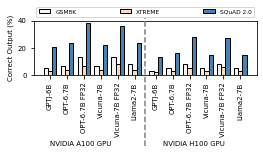

,Models,GSM8K,XTREME,SQuAD 2.0
0,GPTJ-6B,5,3,21
1,OPT-6.7B,7,4,24
2,OPT-6.7B FP32,13,7,38
3,Vicuna-7B,7,4,22
4,Vicuna-7B FP32,13,8,36
5,Llama2-7B,8,4,24
6,GPTJ-6B,3,2,13
7,OPT-6.7B,5,3,16
8,OPT-6.7B FP32,8,5,28
9,Vicuna-7B,5,3,15


In [48]:
data = pd.read_excel('data/fig8-profilingtime.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})
# data = data.rename(columns={'Unnamed: 0': 'Methods', 'Recall (%)': 'Recall'})

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(4, 1))

bar_width = 0.12
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(3):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 5:  
            current_pos += 3 * bar_width + 2 * bar_width
        else: 
            current_pos += 3 * bar_width + bar_width

positions = np.array(positions).reshape(len(data), 3)

# plt.bar(positions[:, 0], data.GSM8K, width=bar_width, edgecolor='black', linewidth=1, color='whitesmoke', hatch = '/', zorder=5)  # Yellow
# plt.bar(positions[:, 1], data.XTREME, width=bar_width, edgecolor='black', linewidth=1, color='peachpuff', hatch = '-', zorder=5)  # Yellow
# plt.bar(positions[:, 2], data['SQuAD 2.0'], width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', hatch = '\\', zorder=5)  # Yellow
plt.bar(positions[:, 0], data.GSM8K, width=bar_width, edgecolor='black', linewidth=1, color='whitesmoke', zorder=5)  # Yellow
plt.bar(positions[:, 1], data.XTREME, width=bar_width, edgecolor='black', linewidth=1, color='peachpuff', zorder=5)  # Yellow
plt.bar(positions[:, 2], data['SQuAD 2.0'], width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', zorder=5)  # Yellow

# plt.subplots_adjust(left=0.05, right=0.9)
group_centers = positions.mean(axis=1)
plt.xticks(group_centers, data.Models, rotation = 90, ha='center')
# plt.xticks(x, data.Models, rotation = 90, ha='center')
plt.text(group_centers[7]//2, -52, 'NVIDIA A100 GPU', ha='center')  
plt.text((group_centers[11]-group_centers[7])//2+group_centers[7]+0.6, -52, 'NVIDIA H100 GPU', ha='center')
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=3)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), mode='expand', fontsize='small', ncol=3)

shift = -0.3
target_idx1 = group_centers[6]
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-1.3, ymax=1.05, clip_on=False,zorder=5)
# plt.axvline(x=5.82, color='black', linestyle='-.', ymin=-0.99, ymax=1, clip_on=False)
# labels = ['NVIDIA A100 40GB ', 'NVIDIA H200 ']
# plt.label
plt.yticks([0,20,40])
plt.ylabel('Correct Output (%)')
plt.savefig('figs/fig8-profilingtime.pdf',dpi=100,bbox_inches = 'tight')

plt.show()
data

## Fig 9

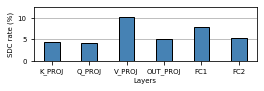

In [50]:
data = pd.read_excel('data/fig9-layerSDC.xlsx')
data.columns=['methods', 'sdc']

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(4, 1))

bar_width = 0.42
r1 = np.arange(len(data))

plt.bar(r1, data.sdc, width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', zorder=5)  # Yellow

plt.xlabel('Layers', labelpad=3)
# labels = data.methods.to_list()
# labels_wrapped = ['_\n'.join(label.split('_')) for label in labels]
# plt.xticks(range(len(labels)), labels_wrapped, ha='center')
plt.xticks(range(len(data)), data.methods, ha='center')
plt.yticks([0, 5, 10])
plt.ylim(0, 12.5)

plt.ylabel('SDC rate (%)')
plt.grid(True,axis='y')
plt.savefig('figs/fig9-layerSDC.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

In [222]:
data

,methods,sdc
0,K_PROJ,4.29
1,Q_PROJ,4.04
2,V_PROJ,10.14
3,OUT_PROJ,5.05
4,FC1,7.80
5,FC2,5.25


## Fig 10

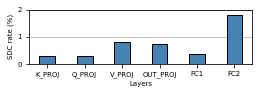

In [52]:
data = pd.read_excel('data/fig10-randomFIexcept.xlsx')
data.columns=['layers', 'sdc']

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(4, 1))

bar_width = 0.42
r1 = np.arange(len(data))

plt.bar(r1, data.sdc, width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', zorder=5)  # Yellow

plt.xlabel('Layers', labelpad=3)
# labels = data.layers.to_list()
# labels_wrapped = ['_\n'.join(label.split('_')) for label in labels]
# plt.xticks(range(len(labels)), labels_wrapped, ha='center')
plt.xticks(range(len(data)), data.layers, ha='center')
plt.yticks([0, 1, 2])
plt.ylim(0, 2)

plt.ylabel('SDC rate (%)')
plt.grid(True,axis='y')
plt.savefig('figs/fig10-randomFIexcept.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## Fig 11

In [1]:
data = pd.read_excel('data/fig11-exceptgptj.xlsx')
data.columns=['layers', 'without protection', 'protect all but not the target layer']

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(1.7, 1.1))

data.layers[3] = '  OUT_PROJ'
bar_width = 0.35
r1 = np.arange(len(data))
r2 = [x + bar_width for x in r1]
# 768cce, f9c676
# plt.bar(r1, data['without protection'], width=bar_width, edgecolor='black', linewidth=1, color='#DCEAF7', hatch = '/', zorder=5)  # Yellow
# plt.bar(r2, data['protect all but not the target layer'], width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', hatch = '\\', zorder=5)  # Yellow
plt.bar(r1, data['without protection'], width=bar_width, edgecolor='black', linewidth=1, color='#DCEAF7', zorder=5)  # Yellow
plt.bar(r2, data['protect all but not the target layer'], width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', zorder=5)  # Yellow

plt.xlabel('Layers',) 
           # labelpad=3)
# labels = data.layers.to_list()
# labels_wrapped = ['_\n'.join(label.split('_')) for label in labels]
# plt.xticks(range(len(labels)), labels_wrapped, ha='center')
plt.xticks(range(len(data)), data.layers, rotation = 90,ha='center')
plt.yticks([0, 5, 10])
plt.ylim(0, 14)

plt.ylabel('SDC rate (%)')
plt.grid(True,axis='y')
# plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), mode='expand', fontsize='small', ncol=2)
plt.savefig('figs/fig11-exceptgptj.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

NameError: name 'pd' is not defined

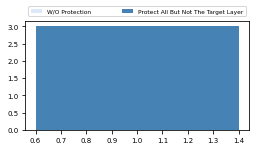

In [61]:
### plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(4, 2))

n11 = [1,1,1,1]
n12 = [1,1,1,1,]
n21 = [1,1,1,1,1]
n22 = [3,3,1,1,1]
lst = ['W/O Protection', 'Protect All But Not The Target Layer']
plt.bar(n11, n12, color='#DCEAF7')
plt.bar(n21, n22, color='#4682B4')

plt.legend(lst, loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), mode='expand', fontsize='small', ncol=2)
plt.savefig('figs/labels2.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## Fig 12

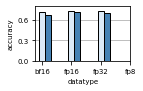

In [7]:
data = pd.read_excel('data/datatype.xlsx')
data.columns=['datatype', 'baseline', 'FI']
data

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(1.7,1))

bar_width = 0.2
r1 = np.arange(len(data))
r2 = [x + bar_width for x in r1]

plt.bar(r1, data['baseline'], width=bar_width, edgecolor='black', linewidth=1, color='#DCEAF7', zorder=5)  # Yellow
plt.bar(r2, data['FI'], width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', zorder=5)  # Yellow

plt.xlabel('datatype')
# labels = data.layers.to_list()
# labels_wrapped = ['_\n'.join(label.split('_')) for label in labels]
# plt.xticks(range(len(labels)), labels_wrapped, ha='center')
plt.xticks(range(len(data)), data.datatype, ha='center')
plt.yticks([0, 0.3, 0.6])
plt.ylim(0, 0.8)

plt.ylabel('accuracy')
plt.grid(True,axis='y')

# plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), mode='expand', fontsize='small', ncol=2)
plt.savefig('figs/datatype.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

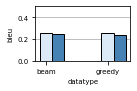

In [14]:
data = pd.read_excel('data/bleu.xlsx')
data.columns=['datatype', 'baseline', 'FI']
data

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(1.7,1))

bar_width = 0.2
r1 = np.arange(len(data))
r2 = [x + bar_width for x in r1]

plt.bar(r1, data['baseline'], width=bar_width, edgecolor='black', linewidth=1, color='#DCEAF7', zorder=5)  # Yellow
plt.bar(r2, data['FI'], width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', zorder=5)  # Yellow

plt.xlabel('datatype')
# labels = data.layers.to_list()
# labels_wrapped = ['_\n'.join(label.split('_')) for label in labels]
# plt.xticks(range(len(labels)), labels_wrapped, ha='center')
plt.xticks(range(len(data)), data.datatype, ha='center')
plt.yticks([0, 0.2, 0.4])
plt.ylim(0, 0.5)

plt.ylabel('bleu')
plt.grid(True,axis='y')

# plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), mode='expand', fontsize='small', ncol=2)
plt.savefig('figs/bleu.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

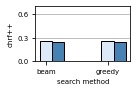

In [79]:
data = pd.read_excel('data/bleu.xlsx')
data.columns=['datatype', 'baseline', 'FI']
data

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(1.7,1))

bar_width = 0.2
r1 = np.arange(len(data))
r2 = [x + bar_width for x in r1]

plt.bar(r1, data['baseline'], width=bar_width, edgecolor='black', linewidth=1, color='#DCEAF7', zorder=5)  # Yellow
plt.bar(r2, data['FI'], width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', zorder=5)  # Yellow

plt.xlabel('search method')
# labels = data.layers.to_list()
# labels_wrapped = ['_\n'.join(label.split('_')) for label in labels]
# plt.xticks(range(len(labels)), labels_wrapped, ha='center')
plt.xticks(range(len(data)), data.datatype, ha='center')
plt.yticks([0, 0.3, 0.6])
plt.ylim(0, 0.7)

plt.ylabel('chrf++')
plt.grid(True,axis='y')

# plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), mode='expand', fontsize='small', ncol=2)
plt.savefig('figs/bleu.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## Fig 13

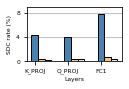

In [64]:
data = pd.read_excel('data/fig13-criticalgptj.xlsx')
data.columns=['layers', 'without protection', 'protect critical layers', 'protect critical layers + target layer']

data
plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(1.7, 1))

bar_width = 0.2
r1 = np.arange(len(data))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# plt.bar(r1, data['without protection'], width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', hatch = '/', zorder=5)  # Yellow
# plt.bar(r2, data['protect critical layers'], width=bar_width, edgecolor='black', linewidth=1, color='#f9c676', hatch = '-', zorder=5)  # Yellow
# plt.bar(r3, data['protect critical layers + target layer'], width=bar_width, edgecolor='black', linewidth=1, color='#DCEAF7', hatch = '\\', zorder=5)  # Yellow
plt.bar(r1, data['without protection'], width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', zorder=5)  # Yellow
plt.bar(r2, data['protect critical layers'], width=bar_width, edgecolor='black', linewidth=1, color='#f9c676', hatch = '-', zorder=5)  # Yellow
plt.bar(r3, data['protect critical layers + target layer'], width=bar_width, edgecolor='black', linewidth=1, color='#DCEAF7', zorder=5)  # Yellow

plt.xlabel('Layers', labelpad=3)
plt.xticks(range(len(data)), data.layers, ha='center')
plt.yticks([0, 4, 8])
plt.ylim(0, 9)

plt.ylabel('SDC rate (%)')
plt.grid(True,axis='y')
# plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), mode='expand', fontsize='small', ncol=2)
plt.savefig('figs/fig13-criticalgptj.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

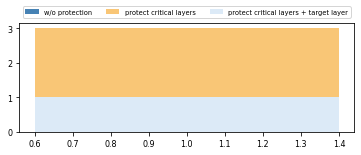

In [65]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(6, 2))

n11 = [1,1,1,1]
n12 = [1,1,1,1,]
n21 = [1,1,1,1,1]
n22 = [3,3,1,1,1]
n13 = [1,1,1,1]
n32 = [1,1,1,1,]
lst = ['w/o protection', 'protect critical layers', 'protect critical layers + target layer']
plt.bar(n11, n12, color='#4682B4',)
plt.bar(n21, n22, color='#f9c676',)
plt.bar(n13, n32, color='#DCEAF7',)

plt.legend(lst, loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), mode='expand', fontsize='small', ncol=3)
plt.savefig('figs/labels3.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## Fig 14

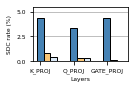

In [66]:
data = pd.read_excel('data/fig14-criticalqwen.xlsx')
data.columns=['layers', 'without protection', 'protect critical layers', 'protect critical layers + target layer']
data

plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(1.7, 1))

bar_width = 0.2
r1 = np.arange(len(data))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# plt.bar(r1, data['without protection'], width=bar_width, edgecolor='black', linewidth=1, color='#768cce', hatch = '/\/', zorder=5)  # Yellow
# plt.bar(r2, data['protect critical layers'], width=bar_width, edgecolor='black', linewidth=1, color='#f9c676', hatch = '/', zorder=5)  # Yellow
# plt.bar(r3, data['protect critical layers + target layer'], width=bar_width, edgecolor='black', linewidth=1, color='#bd3c33', hatch = '\/', zorder=5)  # Yellow
plt.bar(r1, data['without protection'], width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', zorder=5)  # Yellow
plt.bar(r2, data['protect critical layers'], width=bar_width, edgecolor='black', linewidth=1, color='#f9c676', zorder=5)  # Yellow
plt.bar(r3, data['protect critical layers + target layer'], width=bar_width, edgecolor='black', linewidth=1, color='#DCEAF7', zorder=5)  # Yellow

plt.xlabel('Layers', labelpad=3)
plt.xticks(range(len(data)), data.layers, ha='center')
plt.yticks([0, 2.5, 5])
plt.ylim(0, 5.5)

plt.ylabel('SDC rate (%)')
plt.grid(True,axis='y')

# plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), mode='expand', fontsize='small', ncol=2)
plt.savefig('figs/fig14-criticalqwen.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## Fig 15

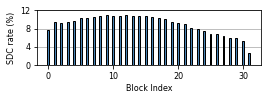

In [234]:
data = pd.read_excel('data/fig15-block.xlsx')

data
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(4, 1))

bar_width = 0.3
r1 = np.arange(len(data))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, data['SDC rate (%)'], width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', zorder=5)  # Yellow
# plt.bar(r2, data['protect critical layers'], width=bar_width, edgecolor='black', linewidth=1, color='#f9c676', hatch = '/', zorder=5)  # Yellow
# plt.bar(r3, data['protect critical layers + target layer'], width=bar_width, edgecolor='black', linewidth=1, color='#bd3c33', hatch = '\/', zorder=5)  # Yellow

plt.xlabel('Block Index', labelpad=3)
plt.xticks([0,10,20,30], ha='center')
plt.yticks([0, 4, 8, 12])
plt.ylim(0, 12)

plt.ylabel('SDC rate (%)')
plt.grid(True,axis='y')

# plt.legend(data.columns[1:], loc='upper center', fontsize='small', ncol=1)
# plt.legend(data.columns[1:], bbox_to_anchor=(1.5, 1), fontsize='small')
plt.savefig('figs/fig15-block.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## Fig 18

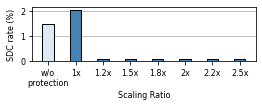

In [419]:
data = pd.read_excel('data/fig18-scalingfactor.xlsx', header = None)
data.columns = ['w/o protection', 'scaling ratio']

plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(4, 1))
bar_width = 0.42
colors = ['#DCEAF7', '#4682B4', '#4682B4', '#4682B4', '#4682B4', '#4682B4', '#4682B4', '#4682B4']
plt.bar(data['w/o protection'], data['scaling ratio'], width=bar_width, edgecolor='black', linewidth=1, color=colors, zorder=5)  # Yellow
labels = data['w/o protection'].to_list()
labels_wrapped = ['\n'.join(label.split(' ')) for label in labels]
plt.xticks(range(len(labels)), labels_wrapped, ha='center')
plt.xlabel('Scaling Ratio', labelpad=3)
plt.yticks([0, 1, 2])
# plt.ylim(0, 2.2)

plt.ylabel('SDC rate (%)')
plt.grid(True,axis='y')
plt.savefig('figs/fig18-scalingfactor.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## Fig 19

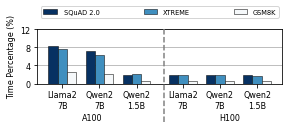

In [86]:
data = pd.read_excel('data/fig19-firsttokentimepercentage.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})
data

plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(4,1))


bar_width = 0.12
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(3):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 2:  
            current_pos += 3 * bar_width + 2 * bar_width
        else: 
            current_pos += 3 * bar_width + bar_width

positions = np.array(positions).reshape(len(data), 3)

# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow

# plt.bar(positions[:, 0], data[' SQuAD 2.0'], width=bar_width, label='FI', edgecolor='black', linewidth=0.5, color='#073162', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['XTREME'], width=bar_width, label='ranger', edgecolor='black', linewidth=0.5, color='#408fbf', hatch = '-', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa', hatch = '\\',zorder=5)  # Red
plt.bar(positions[:, 0], data[' SQuAD 2.0'], width=bar_width, label='FI', edgecolor='black', linewidth=0.5, color='#073162',zorder=5)  # Green
plt.bar(positions[:, 1], data['XTREME'], width=bar_width, label='ranger', edgecolor='black', linewidth=0.5, color='#408fbf', zorder=5)  # Blue
plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red

plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=1)
# plt.xlabel('Models')
plt.ylabel('Time Percentage (%)')
# plt.title('Compare Different Methods')
group_centers = positions.mean(axis=1)

plt.text(group_centers[3]//2+0.5, -8, 'A100', ha='center')  
plt.text((group_centers[5]-group_centers[3])//2+group_centers[3]+0.6, -8, 'H100', ha='center')

plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.15, 1, 0.2), mode='expand', fontsize='small', ncol=3)
shift = -0.25
target_idx1 = group_centers[3]
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.7, ymax=1.02, clip_on=False,zorder=5)

labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split('-')) for label in labels]
plt.xticks(group_centers, labels_wrapped, ha='center')
plt.grid(True,axis='y')
plt.yticks([0,4,8,12])
plt.ylim(0, 12)
plt.gca().margins(x=0.05)
plt.savefig('figs/fig19-firsttokentimepercentage.pdf',dpi=100,bbox_inches = 'tight')

plt.show()
# data.columns

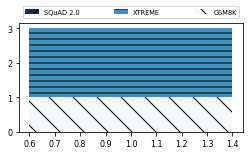

In [258]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(4, 2))

n11 = [1,1,1,1]
n12 = [1,1,1,1,]
n21 = [1,1,1,1,1]
n22 = [3,3,1,1,1]
n13 = [1,1,1,1]
n32 = [1,1,1,1,]
lst = ['SQuAD 2.0', 'XTREME', 'GSM8K']
plt.bar(n11, n12, color='#073162', hatch = '/')
plt.bar(n21, n22, color='#408fbf', hatch = '--')
plt.bar(n13, n32, color='#f5f8fa', hatch = '\\')

plt.legend(lst, loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), mode='expand', fontsize='small', ncol=3)
plt.savefig('figs/labels4.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## Fig 25

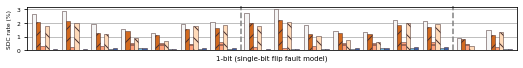

In [95]:
data = pd.read_excel('data/fig25-singlebit.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})
data

plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(8,0.8))

bar_width = 0.12
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(6):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 6 or i ==13:  
            current_pos += 6 * bar_width + 2 * bar_width
        else: 
            current_pos += 6 * bar_width + bar_width

positions = np.array(positions).reshape(len(data), 6)

# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow

plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', zorder=5)  # Green
plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='chocolate', hatch = '//', zorder=5)  # Blue
plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '--',zorder=5)  # Red
plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = '\\\\', zorder=5)  # Yellow
plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', zorder=5)  # Red
# plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow

plt.subplots_adjust(left=0.05, right=0.9)
plt.ylabel('SDC rate (%)')
# plt.title('Compare Different Methods')
plt.xlabel('1-bit (single-bit flip fault model)', fontsize = 7)
group_centers = positions.mean(axis=1)
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split('-')) for label in labels]
plt.xticks(group_centers, labels_wrapped, ha='center')
plt.xticks([])

# plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.05, 1, 0.2), mode='expand', fontsize='small', ncol=6)
shift = -0.45
target_idx1 = group_centers[7]
target_idx2 = group_centers[14]
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0, ymax=1.01, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0, ymax=1.01, clip_on=False)

# plt.text((group_centers[0]+group_centers[10])//2, -1.8, 'SQuAD 2.0', ha='center')  
# plt.text((group_centers[14]-group_centers[7])//2+group_centers[7], -1.8, 'XTREME', ha='center')
# plt.text((group_centers[15]-group_centers[14])//2+group_centers[14]+0.2, -1.8, 'GSM8K', ha='center')
# 'SQuAD 2.0', 'XTREME', 'GSM8K'

plt.yticks([0,1,2,3])
plt.grid(True,axis='y')
plt.gca().margins(x=0.01)
plt.savefig('figs/fig25-singlebit.pdf',dpi=100,bbox_inches = 'tight')

plt.show()
# data

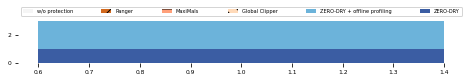

In [94]:
n11 = [1,1,1,1]
n12 = [1,1,1,1,]
n21 = [1,1,1,1,1]
n22 = [3,3,1,1,1]
n31 = [1,1,1,1]
n32 = [1,1,1,1,]
n41 = [1,1,1,1]
n42 = [1,1,1,1,]
n51 = [1,1,1,1,1]
n52 = [3,3,1,1,1]
n61 = [1,1,1,1]
n62 = [1,1,1,1,]

plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(8,0.8))

lst = ['w/o protection', 'Ranger', 'MaxiMals', 'Global Clipper', 'ZERO-DRY + offline profiling', 'ZERO-DRY']
plt.bar(n11, n12,color='whitesmoke')  
plt.bar(n21, n22, color = 'chocolate',hatch = '//', zorder=5)  
plt.bar(n31, n32, color = 'lightsalmon', hatch = '--',zorder=5)  
plt.bar(n41, n42, color = 'peachpuff', hatch = '\\\\', zorder=5)  
plt.bar(n51, n52, color='#6cb3da', zorder=5)  
plt.bar(n61, n62, color='#3b5da3', zorder=5)  

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.legend(lst, loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), mode='expand', fontsize='small', ncol=6)
plt.savefig('figs/labels5.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## Fig 26

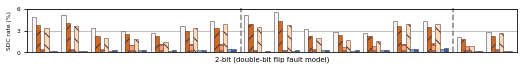

In [79]:
data = pd.read_excel('data/fig26-doublebit.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})
data

plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(8,0.8))

bar_width = 0.12
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(6):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 6 or i ==13:  
            current_pos += 6 * bar_width + 2 * bar_width
        else: 
            current_pos += 6 * bar_width + bar_width

positions = np.array(positions).reshape(len(data), 6)

# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow

plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', zorder=5)  # Green
plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='chocolate', hatch = '//', zorder=5)  # Blue
plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '--',zorder=5)  # Red
plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = '\\\\', zorder=5)  # Yellow
plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', zorder=5)  # Red
plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow

plt.subplots_adjust(left=0.05, right=0.9)
plt.ylabel('SDC rate (%)')
plt.xlabel('2-bit (double-bit flip fault model)', fontsize = 7)
plt.yticks([0, 3, 6])

group_centers = positions.mean(axis=1)
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split('-')) for label in labels]
plt.xticks(group_centers, labels_wrapped, ha='center')
plt.xticks([])
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.text((group_centers[0]+group_centers[10])//2, -4, 'SQuAD 2.0', ha='center', fontsize = 7)  
# plt.text((group_centers[14]-group_centers[7])//2+group_centers[7], -4, 'XTREME', ha='center', fontsize = 7)
# plt.text((group_centers[15]-group_centers[14])//2+group_centers[14]+0.2, -4, 'GSM8K', ha='center', fontsize = 7)
# 'SQuAD 2.0', 'XTREME', 'GSM8K'

# plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.01, 1, 0.2), mode='expand', fontsize='small', ncol=6)

shift = -0.45
target_idx1 = float(group_centers[7])
target_idx2 = float(group_centers[14])
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=0, ymax=1.01, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=0, ymax=1.01, clip_on=False)

plt.gca().margins(x=0.01)
plt.grid(True,axis='y')
plt.savefig('figs/fig26-doublebit.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## Fig 27

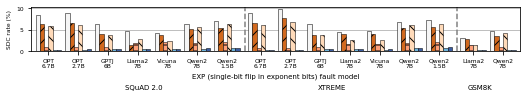

In [80]:
data = pd.read_excel('data/fig27-singleexpbit.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})
data

plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(8,0.8))

total_bars = len(data)
positions = [0]

# plt.bar(positions[::6], data['w/o protection'], width=bar_width, label='FI', edgecolor='black', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[1::6], data['Ranger'], width=bar_width, label='ranger', edgecolor='black', linewidth=0.5, color='chocolate', hatch = '\\', zorder=5)  # Blue
# plt.bar(positions[2::6], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[3::6], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='black', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[4::6], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='black', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[5::6], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='black', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow

bar_width = 0.12
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(6):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 6 or i ==13:  
            current_pos += 6 * bar_width + 2 * bar_width
        else: 
            current_pos += 6 * bar_width + bar_width

positions = np.array(positions).reshape(len(data), 6)

plt.bar(positions[:, 0], data['w/o protection'], bar_width,label='FI', edgecolor='black', linewidth=0.5,color='whitesmoke', zorder=5)
plt.bar(positions[:, 1], data['Ranger'], bar_width,label='Ranger', edgecolor='black', linewidth=0.5,color='chocolate', hatch='//', zorder=5)
plt.bar(positions[:, 2], data['MaxiMals'], bar_width,label='MaxiMals', edgecolor='black', linewidth=0.5,color='lightsalmon', hatch='--', zorder=5)
plt.bar(positions[:, 3], data['Global Clipper'], bar_width,label='Global Clipper', edgecolor='black', linewidth=0.5,color='peachpuff', hatch='\\\\', zorder=5)
plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], bar_width,label='ZERO-DRY + offline', edgecolor='black', linewidth=0.5,color='#6cb3da', zorder=5)
plt.bar(positions[:, 5], data['ZERO-DRY'], bar_width,label='ZERO-DRY', edgecolor='black', linewidth=0.5,color='#3b5da3', zorder=5)

group_centers = positions.mean(axis=1)
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split('-')) for label in labels]
plt.xticks(group_centers, labels_wrapped, ha='center')

plt.subplots_adjust(left=0.05, right=0.9)
plt.ylabel('SDC rate (%)')
plt.yticks([0, 5, 10])
plt.xlabel('EXP (single-bit flip in exponent bits) fault model', fontsize = 7)
# plt.subplots_adjust(bottom=0.5)
plt.text((group_centers[0]+group_centers[7])//2, -9, 'SQuAD 2.0', ha='center',fontsize = 7)  
plt.text((group_centers[14]-group_centers[7])//2+group_centers[7], -9, 'XTREME', ha='center',fontsize = 7)
plt.text((group_centers[15]-group_centers[14])//2+group_centers[14]+0.2, -9, 'GSM8K', ha='center',fontsize = 7)
# 'SQuAD 2.0', 'XTREME', 'GSM8K'

# plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.01, 1, 0.2), mode='expand', fontsize='small', ncol=6)
shift = -0.45
target_idx1 = group_centers[7]
target_idx2 = group_centers[14] 
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0, ymax=1.01, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0, ymax=1.01, clip_on=False)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')

plt.gca().margins(x=0.01)
plt.grid(True,axis='y')
plt.savefig('figs/fig27-singleexpbit.pdf',dpi=100,bbox_inches = 'tight')

plt.show()
# data.columns


In [81]:
data

,Models,w/o protection,Ranger,MaxiMals,Global Clipper,ZERO-DRY + offline profiling,ZERO-DRY
0,OPT-6.7B,8.56,6.43,0.89,5.96,0.07,0.23
1,OPT-2.7B,8.80,6.67,0.83,6.16,0.11,0.31
2,GPTJ-6B,6.31,3.92,0.90,3.73,0.32,0.48
3,Llama2-7B,4.75,1.38,1.87,2.81,0.38,0.50
4,Vicuna-7B,4.24,3.72,1.95,2.37,0.38,0.41
5,Qwen2-7B,6.23,5.04,1.77,5.64,0.49,0.56
6,Qwen2-1.5B,6.97,5.36,1.97,6.26,0.63,0.76
7,OPT-6.7B,8.88,6.53,0.65,6.14,0.10,0.20
8,OPT-2.7B,9.79,7.79,0.69,6.71,0.20,0.27
9,GPTJ-6B,6.23,3.75,0.91,3.81,0.43,0.46


## Fig 27

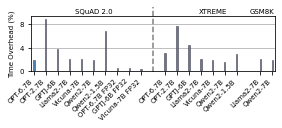

In [82]:
data = pd.read_excel('data/fig27-timeoverhead.xlsx', header = None)
data = data.iloc[:,1:]
data.columns = ['Models', 'Values']
data.shape[0]

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(4,1))

positions = [0]
values = (data.shape[0])
for i in range(1, data.shape[0]):
    if i == 10 or i == 17:  
        positions.append(positions[i-1] + 2)
    else:
        positions.append(positions[i-1] + 1)

plt.bar(positions, data['Values'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='#4682B4', zorder=5)  # Green

plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=1)
# plt.xlabel('Models')
plt.ylabel('Time Overhead (%)')
# plt.title('Compare Different Methods')

plt.text((positions[0]+positions[10])//2, 9.8, 'SQuAD 2.0', ha='center')  
plt.text((positions[17]-positions[10])//2+positions[10], 9.8, 'XTREME', ha='center')
plt.text((positions[18]-positions[17])//2+positions[17]+0.15, 9.8, 'GSM8K', ha='center')
# 'SQuAD 2.0', 'XTREME', 'GSM8K'

# plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.15, 1, 0.2), mode='expand', fontsize='small', ncol=3)
shift = -1
target_idx1 = positions[10]
target_idx2 = positions[17]
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.03, ymax=1.18, clip_on=False)
# plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.03, ymax=1.18, clip_on=False)

labels = data.Models.to_list()
labels_wrapped = ['_\n'.join(label.split('_')) for label in labels]
plt.xticks(positions, labels_wrapped, rotation = 45, ha='right')
plt.yticks([0, 4, 8])
plt.grid(True,axis='y')
plt.gca().margins(x=0.01)
plt.savefig('figs/fig27-timeoverhead.pdf',dpi=100,bbox_inches = 'tight')

plt.show()
# # data

In [349]:
data

,Models,Values
0,OPT-6.7B,1.892533
1,OPT-2.7B,8.910891
2,GPT-J-6B,3.682971
3,Llama-2-7B,2.025618
4,Vicuna-7B-v1.5,1.984588
5,Qwen2-7B,1.896245
6,Qwen2-1.5B,6.801484
7,OPT-6.7B FP32,0.525853
8,GPT-J-6B FP32,0.525853
9,Vicuna-7B-v1.5 FP32,0.331567


## fig 28

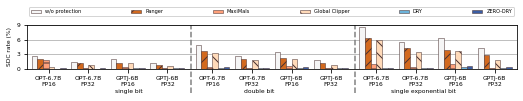

In [104]:
data = pd.read_excel('data/fig28-datatype.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})
data.columns

plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(8,0.8))

total_bars = len(data)
bar_width = 0.12
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(6):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 3 or i ==7:  
            current_pos += 6 * bar_width + 2 * bar_width
        else: 
            current_pos += 6 * bar_width + bar_width
positions = np.array(positions).reshape(len(data), 6)

# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow

# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='chocolate', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['DRY'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', zorder=5)  # Green
plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='chocolate', hatch = '//', zorder=5)  # Blue
plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '--',zorder=5)  # Red
plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = '\\\\', zorder=5)  # Yellow
plt.bar(positions[:, 4], data['DRY'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', zorder=5)  # Red
plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow

# # labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)

plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('SDC rate (%)')
plt.yticks([0, 3, 6, 9])

group_centers = positions.mean(axis=1)
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:2]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
plt.text((group_centers[0]+group_centers[4])//2, -5, 'single bit', ha='center')  
plt.text((group_centers[8]-group_centers[4])//2+group_centers[4], -5, 'double bit', ha='center')
plt.text((group_centers[11]-group_centers[8])//2+group_centers[8], -5, 'single exponential bit', ha='center')
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.15, 1, 0.2), mode='expand', fontsize='small', ncol=6)
shift = -0.45
target_idx1 = group_centers[4]
target_idx2 = group_centers[8]
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.55, ymax=1, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.55, ymax=1, clip_on=False)
plt.gca().margins(x=0.01)
plt.grid(True,axis='y')
plt.savefig('figs/fig28-datatype.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

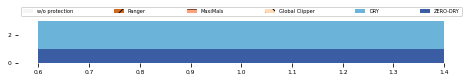

In [105]:
n11 = [1,1,1,1]
n12 = [1,1,1,1,]
n21 = [1,1,1,1,1]
n22 = [3,3,1,1,1]
n31 = [1,1,1,1]
n32 = [1,1,1,1,]
n41 = [1,1,1,1]
n42 = [1,1,1,1,]
n51 = [1,1,1,1,1]
n52 = [3,3,1,1,1]
n61 = [1,1,1,1]
n62 = [1,1,1,1,]

plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(8,0.8))

lst = ['w/o protection', 'Ranger', 'MaxiMals', 'Global Clipper', 'DRY', 'ZERO-DRY']
plt.bar(n11, n12,color='whitesmoke')  
plt.bar(n21, n22, color = 'chocolate',hatch = '//', zorder=5)  
plt.bar(n31, n32, color = 'lightsalmon', hatch = '--',zorder=5)  
plt.bar(n41, n42, color = 'peachpuff', hatch = '\\\\', zorder=5)  
plt.bar(n51, n52, color='#6cb3da', zorder=5)  
plt.bar(n61, n62, color='#3b5da3', zorder=5)  

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.legend(lst, loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), mode='expand', fontsize='small', ncol=6)
plt.savefig('figs/labels6.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## Fig 29

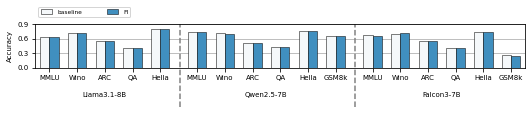

In [17]:
data = pd.read_excel('data/fig80sn.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})
data

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(8,0.8))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(2):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 4 or i ==10:  
            current_pos += 2 * bar_width + 2 * bar_width
        else: 
            current_pos += 2 * bar_width + bar_width
positions = np.array(positions).reshape(len(data), 2)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['baseline'], width=bar_width, label='baseline', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
plt.bar(positions[:, 1], data['FI'], width=bar_width, label='FI', edgecolor='black', linewidth=0.5, color='#408fbf', zorder=5)  # Blue
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.yticks([0, 0.3, 0.6, 0.9])
plt.text(group_centers[2], -0.6, 'Llama3.1-8B', ha='center')  
plt.text(group_centers[9]-0.45, -0.6, 'Qwen2.5-7B', ha='center')
plt.text(group_centers[14]-0.15, -0.6, 'Falcon3-7B', ha='center')
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:3]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.1, 0.2, 0.2), mode='expand', fontsize='small', ncol=2)
shift = -0.49
target_idx1 = group_centers[6]
target_idx2 = group_centers[12]
plt.gca().margins(x=0.01)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.9, ymax=1, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.9, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/singleneuron.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## multiple choice

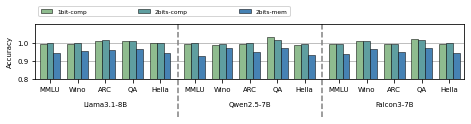

In [26]:
data = pd.read_excel('data/multiple-choice.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(7,1))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(3):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 4 or i ==9:  
            current_pos += 5 * bar_width
        else: 
            current_pos += 4 * bar_width
positions = np.array(positions).reshape(len(data), 3)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['2bits-comp'], width=bar_width, label='2bits-weights', edgecolor='black', linewidth=0.5, color='darkseagreen',  zorder=5)  # Red
plt.bar(positions[:, 1], data['1bit-comp'], width=bar_width, label='2bits-neurons', edgecolor='black', linewidth=0.5, color='cadetblue', zorder=5)  # Blue
plt.bar(positions[:, 2], data['2bits-mem'], width=bar_width, label='1bit-neurons', edgecolor='black', linewidth=0.5, color='steelblue', zorder=5)
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)
plt.text(group_centers[2], 0.65, 'Llama3.1-8B', ha='center')  
plt.text(group_centers[7], 0.65, 'Qwen2.5-7B', ha='center')
plt.text(group_centers[12], 0.65, 'Falcon3-7B', ha='center')
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:3]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[2:], loc='lower left', bbox_to_anchor=(0, 1.1, 0.6, 0.2), mode='expand', fontsize='small', ncol=4)
shift = -0.245
target_idx1 = group_centers[5]
target_idx2 = group_centers[10]
plt.gca().margins(x=0.01)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.7, ymax=1, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.7, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/multiple-choice.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## gsm8k

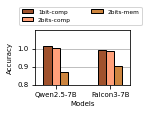

In [27]:
data = pd.read_excel('data/gsm8k.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(1.7,1))

data.columns=['model', 'baseline', '1bit-comp', '2bits-comp', '2bits-mem']

bar_width = 0.15
num_bars = 3  # 每组有4个柱子
group_width = bar_width * num_bars  # 每组的总宽度
group_centers = np.arange(len(data))

# 计算每个bar的位置，使它们居中对齐
r1 = group_centers - group_width/2 + bar_width/2  # 第一个bar
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]



plt.bar(r1, data['1bit-comp'], width=bar_width, edgecolor='black', linewidth=1, color='sienna', zorder=5)  # Yellow
plt.bar(r2, data['2bits-comp'], width=bar_width, edgecolor='black', linewidth=1, color='lightsalmon', zorder=5)  # Yellow
plt.bar(r3, data['2bits-mem'], width=bar_width, edgecolor='black', linewidth=1, color='peru', zorder=5)  # Yellow

plt.xlabel('Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Accuracy')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


plt.legend(data.columns[2:], loc='lower left', bbox_to_anchor=(-0.2, 1.05, 1.35, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.1)

plt.grid(True,axis='y')
plt.savefig('figs/gsm8k.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## xmtbleu 

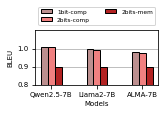

In [3]:
data = pd.read_excel('data/xmt-bleu.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(2.2,1))

data.columns=['model', 'baseline', '1bit-comp', '2bits-comp', '2bits-mem']

bar_width = 0.15
num_bars = 3  # 每组有4个柱子
group_width = bar_width * num_bars  # 每组的总宽度
group_centers = np.arange(len(data))

# 计算每个bar的位置，使它们居中对齐
r1 = group_centers - group_width/2 + bar_width/2  # 第一个bar
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]



plt.bar(r1, data['1bit-comp'], width=bar_width, edgecolor='black', linewidth=1, color='rosybrown', zorder=5)  # Yellow
plt.bar(r2, data['2bits-comp'], width=bar_width, edgecolor='black', linewidth=1, color='lightcoral', zorder=5)  # Yellow
plt.bar(r3, data['2bits-mem'], width=bar_width, edgecolor='black', linewidth=1, color='firebrick', zorder=5)  # Yellow

plt.xlabel('Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('BLEU')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


plt.legend(data.columns[2:], loc='lower left', bbox_to_anchor=(0, 1.05, 1, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.05)

plt.grid(True,axis='y')
plt.savefig('figs/xmt-bleu.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

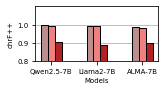

In [66]:
data = pd.read_excel('data/xmt-chrf.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(2.2,1))

data.columns=['model', 'baseline', '1bit-comp', '2bits-comp', '2bits-mem']

bar_width = 0.15
num_bars = 3  # 每组有4个柱子
group_width = bar_width * num_bars  # 每组的总宽度
group_centers = np.arange(len(data))

# 计算每个bar的位置，使它们居中对齐
r1 = group_centers - group_width/2 + bar_width/2  # 第一个bar
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]



plt.bar(r1, data['1bit-comp'], width=bar_width, edgecolor='black', linewidth=1, color='rosybrown', zorder=5)  # Yellow
plt.bar(r2, data['2bits-comp'], width=bar_width, edgecolor='black', linewidth=1, color='lightcoral', zorder=5)  # Yellow
plt.bar(r3, data['2bits-mem'], width=bar_width, edgecolor='black', linewidth=1, color='firebrick', zorder=5)  # Yellow

plt.xlabel('Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('chrF++')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


#plt.legend(data.columns[2:], loc='lower left', bbox_to_anchor=(-0.1, 1.05, 1.2, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.05)

plt.grid(True,axis='y')
plt.savefig('figs/xmt-chrf.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## xlsum

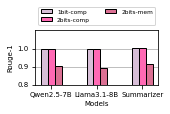

In [6]:
data = pd.read_excel('data/xlsum-r1.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(2.2,1))

data.columns=['model', 'baseline', '1bit-comp', '2bits-comp', '2bits-mem']

bar_width = 0.15
num_bars = 3  # 每组有4个柱子
group_width = bar_width * num_bars  # 每组的总宽度
group_centers = np.arange(len(data))

# 计算每个bar的位置，使它们居中对齐
r1 = group_centers - group_width/2 + bar_width/2  # 第一个bar
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, data['1bit-comp'], width=bar_width, edgecolor='black', linewidth=1, color='thistle', zorder=5)  # Yellow
plt.bar(r2, data['2bits-comp'], width=bar_width, edgecolor='black', linewidth=1, color='hotpink', zorder=5)  # Yellow
plt.bar(r3, data['2bits-mem'], width=bar_width, edgecolor='black', linewidth=1, color='palevioletred', zorder=5)  # Yellow

plt.xlabel('Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Rouge-1')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


plt.legend(data.columns[2:], loc='lower left', bbox_to_anchor=(0, 1.05, 1, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.05)

plt.grid(True,axis='y')
plt.savefig('figs/xlsum-r1.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

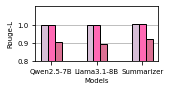

In [7]:
data = pd.read_excel('data/xlsum-rl.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(2.2,1))

data.columns=['model', 'baseline', '1bit-comp', '2bits-comp', '2bits-mem']

bar_width = 0.15
num_bars = 3  # 每组有4个柱子
group_width = bar_width * num_bars  # 每组的总宽度
group_centers = np.arange(len(data))

# 计算每个bar的位置，使它们居中对齐
r1 = group_centers - group_width/2 + bar_width/2  # 第一个bar
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, data['1bit-comp'], width=bar_width, edgecolor='black', linewidth=1, color='thistle', zorder=5)  # Yellow
plt.bar(r2, data['2bits-comp'], width=bar_width, edgecolor='black', linewidth=1, color='hotpink', zorder=5)  # Yellow
plt.bar(r3, data['2bits-mem'], width=bar_width, edgecolor='black', linewidth=1, color='palevioletred', zorder=5)  # Yellow

plt.xlabel('Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Rouge-L')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


#plt.legend(data.columns[2:], loc='lower left', bbox_to_anchor=(-0.1, 1.05, 1.2, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.05)

plt.grid(True,axis='y')
plt.savefig('figs/xlsum-rl.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## squad

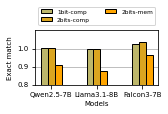

In [8]:
data = pd.read_excel('data/sq-exact.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(2.2,1))

data.columns=['model', 'baseline', '1bit-comp', '2bits-comp', '2bits-mem']

bar_width = 0.15
num_bars = 3  # 每组有4个柱子
group_width = bar_width * num_bars  # 每组的总宽度
group_centers = np.arange(len(data))

# 计算每个bar的位置，使它们居中对齐
r1 = group_centers - group_width/2 + bar_width/2  # 第一个bar
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, data['1bit-comp'], width=bar_width, edgecolor='black', linewidth=1, color='darkkhaki', zorder=5)  # Yellow
plt.bar(r2, data['2bits-comp'], width=bar_width, edgecolor='black', linewidth=1, color='goldenrod', zorder=5)  # Yellow
plt.bar(r3, data['2bits-mem'], width=bar_width, edgecolor='black', linewidth=1, color='orange', zorder=5)  # Yellow

plt.xlabel('Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Exact match')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


plt.legend(data.columns[2:], loc='lower left', bbox_to_anchor=(0, 1.05, 1, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.05)

plt.grid(True,axis='y')
plt.savefig('figs/sq-exact.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

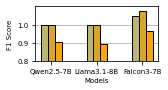

In [9]:
data = pd.read_excel('data/sq-f1.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(2.2,1))

data.columns=['model', 'baseline', '1bit-comp', '2bits-comp', '2bits-mem']

bar_width = 0.15
num_bars = 3  # 每组有4个柱子
group_width = bar_width * num_bars  # 每组的总宽度
group_centers = np.arange(len(data))

# 计算每个bar的位置，使它们居中对齐
r1 = group_centers - group_width/2 + bar_width/2  # 第一个bar
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, data['1bit-comp'], width=bar_width, edgecolor='black', linewidth=1, color='darkkhaki', zorder=5)  # Yellow
plt.bar(r2, data['2bits-comp'], width=bar_width, edgecolor='black', linewidth=1, color='goldenrod', zorder=5)  # Yellow
plt.bar(r3, data['2bits-mem'], width=bar_width, edgecolor='black', linewidth=1, color='orange', zorder=5)  # Yellow

plt.xlabel('Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('F1 Score')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


#plt.legend(data.columns[2:], loc='lower left', bbox_to_anchor=(-0.1, 1.05, 1.2, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.05)

plt.grid(True,axis='y')
plt.savefig('figs/sq-f1.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## average foundation

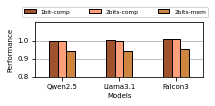

In [35]:
data = pd.read_excel('data/average-foundation.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(3,1))

data.columns=['model', '1bit-comp', '2bits-comp', '2bits-mem']

bar_width = 0.15
num_bars = 3  # 每组有4个柱子
group_width = bar_width * num_bars  # 每组的总宽度
group_centers = np.arange(len(data))

# 计算每个bar的位置，使它们居中对齐
r1 = group_centers - group_width/2 + bar_width/2  # 第一个bar
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, data['1bit-comp'], width=bar_width, edgecolor='black', linewidth=1, color='sienna', zorder=5)  # Yellow
plt.bar(r2, data['2bits-comp'], width=bar_width, edgecolor='black', linewidth=1, color='lightsalmon', zorder=5)  # Yellow
plt.bar(r3, data['2bits-mem'], width=bar_width, edgecolor='black', linewidth=1, color='peru', zorder=5)  # Yellow

plt.xlabel('Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Performance')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(-0.1, 1.05, 1.15, 0.2), mode='expand', fontsize='small', ncol=3)
plt.gca().margins(x=0.1)

plt.grid(True,axis='y')
plt.savefig('figs/average-foundation.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## avarage task

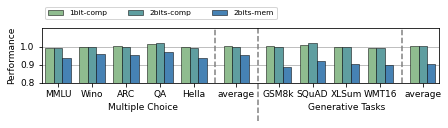

In [49]:
data = pd.read_excel('data/average-task.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})

plt.rcParams.update({'font.size': 9})
plt.figure(figsize=(6.5,1))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(3):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 4 or i ==5 or i ==9:  
            current_pos += 5 * bar_width
        else: 
            current_pos += 4 * bar_width
positions = np.array(positions).reshape(len(data), 3)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['1bit-comp'], width=bar_width, label='2bits-weights', edgecolor='black', linewidth=0.5, color='darkseagreen',  zorder=5)  # Red
plt.bar(positions[:, 1], data['2bits-comp'], width=bar_width, label='2bits-neurons', edgecolor='black', linewidth=0.5, color='cadetblue', zorder=5)  # Blue
plt.bar(positions[:, 2], data['2bits-mem'], width=bar_width, label='1bit-neurons', edgecolor='black', linewidth=0.5, color='steelblue', zorder=5)
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('Performance')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)
plt.text(group_centers[3]-0.2, 0.65, 'Multiple Choice', ha='center')  
plt.text(group_centers[8], 0.65, 'Generative Tasks', ha='center')

labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:3]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.1, 0.6, 0.2), mode='expand', fontsize='small', ncol=3)
shift = -0.245
target_idx1 = group_centers[5]
target_idx2 = group_centers[6]
target_idx3 = group_centers[10]
plt.gca().margins(x=0.01)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=0, ymax=1, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.7, ymax=1, clip_on=False)
plt.axvline(x=target_idx3 + shift, color='gray', linestyle='--', ymin=0, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/average-task.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## avarage faultmodel

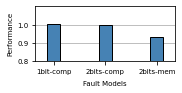

In [42]:
data = pd.read_excel('data/average-faultmodel.xlsx')
data.columns=['a', 'b']

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(2.5, 1))

bar_width = 0.25
r1 = np.arange(len(data))

plt.bar(r1, data.b, width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', zorder=5)  # Yellow

plt.xlabel('Fault Models', labelpad=6)
# labels = data.methods.to_list()
# labels_wrapped = ['_\n'.join(label.split('_')) for label in labels]
# plt.xticks(range(len(labels)), labels_wrapped, ha='center')
plt.xticks(range(len(data)), data.a, ha='center')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)
plt.gca().margins(x=0.1)
plt.ylabel('Performance')
plt.grid(True,axis='y')
plt.savefig('figs/average-faultmodel.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## meaningless token 

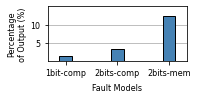

In [39]:
data = pd.read_excel('data/qwen-meaningless-percentage.xlsx')
data.columns=['a', 'b']

plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(2.5, 1))

bar_width = 0.25
r1 = np.arange(len(data))

plt.bar(r1, data.b, width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', zorder=5)  # Yellow

plt.xlabel('Fault Models', labelpad=6)
# labels = data.methods.to_list()
# labels_wrapped = ['_\n'.join(label.split('_')) for label in labels]
# plt.xticks(range(len(labels)), labels_wrapped, ha='center')
plt.xticks(range(len(data)), data.a, ha='center')
plt.yticks([5, 10])
plt.ylim(0, 15)
plt.gca().margins(x=0.1)
plt.ylabel('Percentage\nof Output (%)')
plt.grid(True,axis='y')
plt.savefig('figs/qwen-meaningless-percentage.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## meaningless foundation 

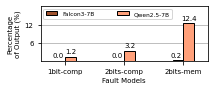

In [10]:
data = pd.read_excel('data/meaningless-foundationmodel.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(3,1))

data.columns=['model', 'Falcon3-7B', 'Qwen2.5-7B']

bar_width = 0.18
num_bars = 2  # 每组有4个柱子
group_width = bar_width * num_bars  # 每组的总宽度
group_centers = np.arange(len(data))

# 计算每个bar的位置，使它们居中对齐
r1 = group_centers - group_width/2 + bar_width/2  # 第一个bar
r2 = [x + bar_width for x in r1]



bar1 = plt.bar(r1, data['Falcon3-7B'], width=bar_width, edgecolor='black', linewidth=1, color='sienna', zorder=5)  # Yellow
bar2 = plt.bar(r2, data['Qwen2.5-7B'], width=bar_width, edgecolor='black', linewidth=1, color='lightsalmon', zorder=5)  # Yellow

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2. - 0.03, height + 0.8,
                 f'{height:.1f}', ha='center', va='bottom', fontsize=7)

def add_labels1(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.8,
                 f'{height:.1f}', ha='center', va='bottom', fontsize=7)
        
add_labels(bar1)
add_labels1(bar2)


plt.xlabel('Fault Models', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Percentage\nof Output (%)')
plt.yticks([6, 12])
plt.ylim(0, 18)


plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 0.72, 0.8, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.1)

plt.grid(True,axis='y')
plt.savefig('figs/meaningless-foundationmodel.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## datatype

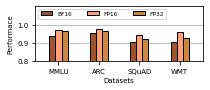

In [65]:
data = pd.read_excel('data/datatype.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(3,1))

data.columns=['model', 'BF16', 'FP16', 'FP32']

bar_width = 0.15
num_bars = 3  # 每组有4个柱子
group_width = bar_width * num_bars  # 每组的总宽度
group_centers = np.arange(len(data))

# 计算每个bar的位置，使它们居中对齐
r1 = group_centers - group_width/2 + bar_width/2  # 第一个bar
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, data['BF16'], width=bar_width, edgecolor='black', linewidth=1, color='sienna', zorder=5)  # Yellow
plt.bar(r2, data['FP16'], width=bar_width, edgecolor='black', linewidth=1, color='lightsalmon', zorder=5)  # Yellow
plt.bar(r3, data['FP32'], width=bar_width, edgecolor='black', linewidth=1, color='peru', zorder=5)  # Yellow

plt.xlabel('Datasets', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Performace')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 0.72, 0.8, 0.2), mode='expand', fontsize='small', ncol=3)
plt.gca().margins(x=0.1)

plt.grid(True,axis='y')
plt.savefig('figs/datatype.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## model size 

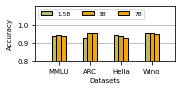

In [63]:
data = pd.read_excel('data/modelsize.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(2.5,1))

data.columns=['model', '1.5B', '3B', '7B']

bar_width = 0.15
num_bars = 3  # 每组有4个柱子
group_width = bar_width * num_bars  # 每组的总宽度
group_centers = np.arange(len(data))

# 计算每个bar的位置，使它们居中对齐
r1 = group_centers - group_width/2 + bar_width/2  # 第一个bar
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, data['1.5B'], width=bar_width, edgecolor='black', linewidth=1, color='darkkhaki', zorder=5)  # Yellow
plt.bar(r2, data['3B'], width=bar_width, edgecolor='black', linewidth=1, color='goldenrod', zorder=5)  # Yellow
plt.bar(r3, data['7B'], width=bar_width, edgecolor='black', linewidth=1, color='orange', zorder=5)  # Yellow

plt.xlabel('Datasets', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Accuracy')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)


plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 0.72, 0.8, 0.2), mode='expand', fontsize='small', ncol=3)
plt.gca().margins(x=0.15)

plt.grid(True,axis='y')
plt.savefig('figs/modelsize.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## quantize 

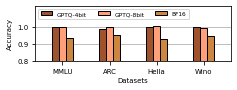

In [60]:
data = pd.read_excel('data/quantize.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(3.5,1))

data.columns=['model', 'GPTQ-4bit', 'GPTQ-8bit', 'BF16']

bar_width = 0.15
num_bars = 3  # 每组有4个柱子
group_width = bar_width * num_bars  # 每组的总宽度
group_centers = np.arange(len(data))

# 计算每个bar的位置，使它们居中对齐
r1 = group_centers - group_width/2 + bar_width/2  # 第一个bar
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, data['GPTQ-4bit'], width=bar_width, edgecolor='black', linewidth=1, color='sienna', zorder=5)  # Yellow
plt.bar(r2, data['GPTQ-8bit'], width=bar_width, edgecolor='black', linewidth=1, color='lightsalmon', zorder=5)  # Yellow
plt.bar(r3, data['BF16'], width=bar_width, edgecolor='black', linewidth=1, color='peru', zorder=5)  # Yellow

plt.xlabel('Datasets', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Accuracy')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.12)


plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 0.72, 0.8, 0.2), mode='expand', fontsize='small', ncol=3)
plt.gca().margins(x=0.1)

plt.grid(True,axis='y')
plt.savefig('figs/quantize.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## beam 

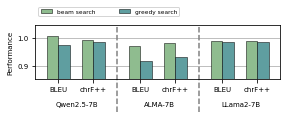

In [43]:
data = pd.read_excel('data/beamwmt.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(4,1))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(2):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 1 or i ==3:  
            current_pos += 4 * bar_width
        else: 
            current_pos += 3 * bar_width
positions = np.array(positions).reshape(len(data), 2)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['beam search'], width=bar_width, label='2bits-weights', edgecolor='black', linewidth=0.5, color='darkseagreen',  zorder=5)  # Red
plt.bar(positions[:, 1], data['greedy search'], width=bar_width, label='2bits-neurons', edgecolor='black', linewidth=0.5, color='cadetblue', zorder=5)  # Blue
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('Performance')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.85, 1.05)
plt.text(group_centers[1]-0.14, 0.75, 'Qwen2.5-7B', ha='center')  
plt.text(group_centers[3]-0.14, 0.75, 'ALMA-7B', ha='center')
plt.text(group_centers[5]-0.14, 0.75, 'LLama2-7B', ha='center')
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:3]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.1, 0.6, 0.2), mode='expand', fontsize='small', ncol=2)
shift = -0.2
target_idx1 = group_centers[2]
target_idx2 = group_centers[4]
plt.gca().margins(x=0.05)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.6, ymax=1, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.6, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/beamwmt.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

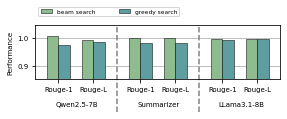

In [44]:
data = pd.read_excel('data/beamxlsum.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(4,1))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(2):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 1 or i ==3:  
            current_pos += 4 * bar_width
        else: 
            current_pos += 3 * bar_width
positions = np.array(positions).reshape(len(data), 2)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['beam search'], width=bar_width, label='2bits-weights', edgecolor='black', linewidth=0.5, color='darkseagreen',  zorder=5)  # Red
plt.bar(positions[:, 1], data['greedy search'], width=bar_width, label='2bits-neurons', edgecolor='black', linewidth=0.5, color='cadetblue', zorder=5)  # Blue
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('Performance')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.85, 1.05)
plt.text(group_centers[1]-0.14, 0.75, 'Qwen2.5-7B', ha='center')  
plt.text(group_centers[3]-0.14, 0.75, 'Summarizer', ha='center')
plt.text(group_centers[5]-0.14, 0.75, 'LLama3.1-8B', ha='center')
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:3]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.1, 0.6, 0.2), mode='expand', fontsize='small', ncol=2)
shift = -0.2
target_idx1 = group_centers[2]
target_idx2 = group_centers[4]
plt.gca().margins(x=0.05)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.6, ymax=1, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.6, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/beamxlsum.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## moe 

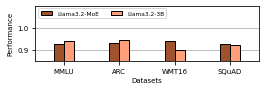

In [11]:
data = pd.read_excel('data/moe.xlsx')

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(4,1))

data.columns=['model', 'Llama3.2-MoE', 'Llama3.2-3B']

bar_width = 0.18
num_bars = 2  # 每组有4个柱子
group_width = bar_width * num_bars  # 每组的总宽度
group_centers = np.arange(len(data))

# 计算每个bar的位置，使它们居中对齐
r1 = group_centers - group_width/2 + bar_width/2  # 第一个bar
r2 = [x + bar_width for x in r1]



plt.bar(r1, data['Llama3.2-MoE'], width=bar_width, edgecolor='black', linewidth=1, color='sienna', zorder=5)  # Yellow
plt.bar(r2, data['Llama3.2-3B'], width=bar_width, edgecolor='black', linewidth=1, color='lightsalmon', zorder=5)  # Yellow


plt.xlabel('Datasets', labelpad=3)
plt.xticks(range(len(data)), data.model, ha='center')
plt.ylabel('Performance')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.85, 1.1)


plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 0.73, 0.6, 0.2), mode='expand', fontsize='small', ncol=2)
plt.gca().margins(x=0.1)

plt.grid(True,axis='y')
plt.savefig('figs/moe.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## gate layer 

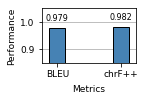

In [46]:
data = pd.read_excel('data/gate-layer.xlsx')
data.columns=['a', 'b']

plt.rcParams.update({'font.size': 9})
plt.figure(figsize=(1.7, 1))

bar_width = 0.25
r1 = np.arange(len(data))

bar1 = plt.bar(r1, data.b, width=bar_width, edgecolor='black', linewidth=1, color='#4682B4', zorder=5)  # Yellow

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                 f'{height:.3f}', ha='center', va='bottom', fontsize=8)
        
add_labels(bar1)

plt.xlabel('Metrics', labelpad=6)
# labels = data.methods.to_list()
# labels_wrapped = ['_\n'.join(label.split('_')) for label in labels]
# plt.xticks(range(len(labels)), labels_wrapped, ha='center')
plt.xticks(range(len(data)), data.a, ha='center')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.85, 1.05)
plt.gca().margins(x=0.1)
plt.ylabel('Performance')
plt.grid(True,axis='y')
plt.savefig('figs/gate-layer.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

## cot 

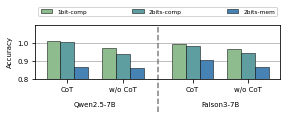

In [48]:
data = pd.read_excel('data/cot.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(4,1))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(3):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 1:  
            current_pos += 5 * bar_width
        else: 
            current_pos += 4 * bar_width
positions = np.array(positions).reshape(len(data), 3)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['1bit-comp'], width=bar_width, label='2bits-weights', edgecolor='black', linewidth=0.5, color='darkseagreen',  zorder=5)  # Red
plt.bar(positions[:, 1], data['2bits-comp'], width=bar_width, label='2bits-neurons', edgecolor='black', linewidth=0.5, color='cadetblue', zorder=5)  # Blue
plt.bar(positions[:, 2], data['2bits-mem'], width=bar_width, label='1bit-neurons', edgecolor='black', linewidth=0.5, color='steelblue', zorder=5)
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.yticks([0.8, 0.9, 1])
plt.ylim(0.8, 1.1)
plt.text(group_centers[1]-0.2, 0.65, 'Qwen2.5-7B', ha='center')  
plt.text(group_centers[3]-0.2, 0.65, 'Falson3-7B', ha='center')
labels = data.Models.to_list()
plt.xticks(group_centers, labels)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.1, 1, 0.2), mode='expand', fontsize='small', ncol=3)
shift = -0.25
target_idx1 = group_centers[2]
plt.gca().margins(x=0.05)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.6, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/cot.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

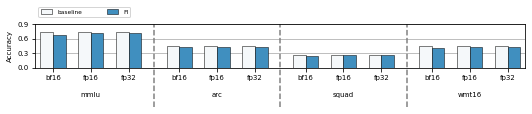

In [60]:
data = pd.read_excel('data/datatype.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})
data

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(8,0.8))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(2):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 2 or i ==5 or i==8:   
            current_pos += 2 * bar_width + 2 * bar_width
        else: 
            current_pos += 2 * bar_width + bar_width
positions = np.array(positions).reshape(len(data), 2)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['baseline'], width=bar_width, label='baseline', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
plt.bar(positions[:, 1], data['FI'], width=bar_width, label='FI', edgecolor='black', linewidth=0.5, color='#408fbf', zorder=5)  # Blue
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.yticks([0, 0.3, 0.6, 0.9])
plt.text(group_centers[1], -0.6, 'mmlu', ha='center')  
plt.text(group_centers[4], -0.6, 'arc', ha='center')
plt.text(group_centers[7], -0.6, 'squad', ha='center')
plt.text(group_centers[10], -0.6, 'wmt16', ha='center')
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:3]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.1, 0.2, 0.2), mode='expand', fontsize='small', ncol=2)
shift = -0.2
target_idx1 = group_centers[3]
target_idx2 = group_centers[6]
target_idx3 = group_centers[9]
plt.gca().margins(x=0.01)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.9, ymax=1, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.9, ymax=1, clip_on=False)
plt.axvline(x=target_idx3 + shift, color='gray', linestyle='--', ymin=-0.9, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/datatype.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

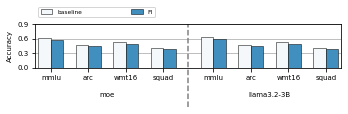

In [55]:
data = pd.read_excel('data/moe.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})
data

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(5,0.8))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(2):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 3:   
            current_pos += 2 * bar_width + 2 * bar_width
        else: 
            current_pos += 2 * bar_width + bar_width
positions = np.array(positions).reshape(len(data), 2)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['baseline'], width=bar_width, label='baseline', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
plt.bar(positions[:, 1], data['FI'], width=bar_width, label='FI', edgecolor='black', linewidth=0.5, color='#408fbf', zorder=5)  # Blue
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.yticks([0, 0.3, 0.6, 0.9])
plt.text(group_centers[2]-0.15, -0.6, 'moe', ha='center')  
plt.text(group_centers[6]-0.15, -0.6, 'llama3.2-3B', ha='center')
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:3]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.1, 0.4, 0.2), mode='expand', fontsize='small', ncol=2)
shift = -0.2
target_idx1 = group_centers[4]
plt.gca().margins(x=0.01)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.9, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/moe.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

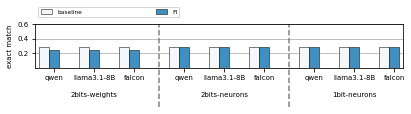

In [63]:
data = pd.read_excel('data/squad-exact.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(6,0.8))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(3):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 2 or i ==5:  
            current_pos += 5 * bar_width
        else: 
            current_pos += 4 * bar_width
positions = np.array(positions).reshape(len(data), 3)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['baseline'], width=bar_width, label='baseline', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
plt.bar(positions[:, 1], data['FI'], width=bar_width, label='FI', edgecolor='black', linewidth=0.5, color='#408fbf', zorder=5)  # Blue
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('exact match')
plt.yticks([0.2, 0.4, 0.6])
plt.text(group_centers[1], -0.4, '2bits-weights', ha='center')  
plt.text(group_centers[4], -0.4, '2bits-neurons', ha='center')
plt.text(group_centers[7], -0.4, '1bit-neurons', ha='center')
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:3]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.1, 0.4, 0.2), mode='expand', fontsize='small', ncol=3)
shift = -0.25
target_idx1 = group_centers[3]
target_idx2 = group_centers[6]
plt.gca().margins(x=0.01)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.9, ymax=1, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.9, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/squad-exact.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

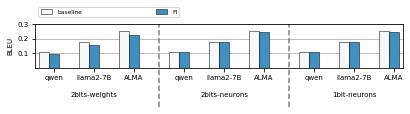

In [68]:
data = pd.read_excel('data/wmt16-bleu.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(6,0.8))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(3):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 2 or i ==5:  
            current_pos += 5 * bar_width
        else: 
            current_pos += 4 * bar_width
positions = np.array(positions).reshape(len(data), 3)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['baseline'], width=bar_width, label='baseline', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
plt.bar(positions[:, 1], data['FI'], width=bar_width, label='FI', edgecolor='black', linewidth=0.5, color='#408fbf', zorder=5)  # Blue
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('BLEU')
plt.yticks([0.1, 0.2, 0.3])
plt.text(group_centers[1], -0.2, '2bits-weights', ha='center')  
plt.text(group_centers[4], -0.2, '2bits-neurons', ha='center')
plt.text(group_centers[7], -0.2, '1bit-neurons', ha='center')
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:3]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.1, 0.4, 0.2), mode='expand', fontsize='small', ncol=3)
shift = -0.25
target_idx1 = group_centers[3]
target_idx2 = group_centers[6]
plt.gca().margins(x=0.01)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.9, ymax=1, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.9, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/wmt16-bleu.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

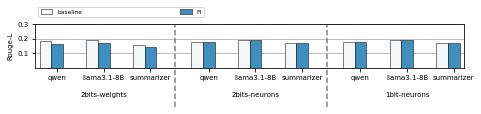

In [77]:
data = pd.read_excel('data/xlsum-rougeL.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(7,0.8))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(3):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 2 or i ==5:  
            current_pos += 5 * bar_width
        else: 
            current_pos += 4 * bar_width
positions = np.array(positions).reshape(len(data), 3)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['baseline'], width=bar_width, label='baseline', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
plt.bar(positions[:, 1], data['FI'], width=bar_width, label='FI', edgecolor='black', linewidth=0.5, color='#408fbf', zorder=5)  # Blue
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('Rouge-L')
plt.yticks([0.1, 0.2, 0.3])
plt.text(group_centers[1], -0.2, '2bits-weights', ha='center')  
plt.text(group_centers[4], -0.2, '2bits-neurons', ha='center')
plt.text(group_centers[7], -0.2, '1bit-neurons', ha='center')
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:3]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.1, 0.4, 0.2), mode='expand', fontsize='small', ncol=3)
shift = -0.29
target_idx1 = group_centers[3]
target_idx2 = group_centers[6]
plt.gca().margins(x=0.01)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.9, ymax=1, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.9, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/xlsum-rougeL.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

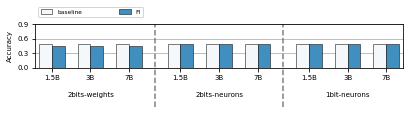

In [44]:
data = pd.read_excel('data/modelsizearc.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})
data

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(6,0.8))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(2):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 2 or i ==5:   
            current_pos += 2 * bar_width + 2 * bar_width
        else: 
            current_pos += 2 * bar_width + bar_width
positions = np.array(positions).reshape(len(data), 2)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['baseline'], width=bar_width, label='baseline', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
plt.bar(positions[:, 1], data['FI'], width=bar_width, label='FI', edgecolor='black', linewidth=0.5, color='#408fbf', zorder=5)  # Blue
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.yticks([0, 0.3, 0.6, 0.9])
plt.text(group_centers[1], -0.6, '2bits-weights', ha='center')  
plt.text(group_centers[4], -0.6, '2bits-neurons', ha='center')
plt.text(group_centers[7], -0.6, '1bit-neurons', ha='center')
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:3]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.1, 0.3, 0.2), mode='expand', fontsize='small', ncol=2)
shift = -0.2
target_idx1 = group_centers[3]
target_idx2 = group_centers[6]
plt.gca().margins(x=0.01)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.9, ymax=1, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.9, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/modelsizearc.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

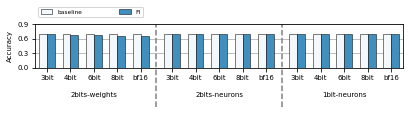

In [47]:
data = pd.read_excel('data/quantizemmlu.xlsx')
data = data.iloc[:,1:]
data = data.rename(columns={'Unnamed: 1': 'Models'})
data

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(6,0.8))

total_bars = len(data)
bar_width = 0.1
positions = []
current_pos = 0

for i in range(len(data)):
    for j in range(2):
        positions.append(current_pos + j * bar_width)
    
    if i < len(data) - 1:  
        if i == 4 or i ==9:   
            current_pos += 2 * bar_width + 2 * bar_width
        else: 
            current_pos += 2 * bar_width + bar_width
positions = np.array(positions).reshape(len(data), 2)
# Create bars with different colors
# plt.bar(r1, data['w/o protection'], width=bar_width, label='FI', color='#474762', hatch = 'o*-+', zorder=5)  # Green
# # plt.bar(r2, data['ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r2, data['Ranger'], width=bar_width, label='ranger', color='#E7BDB0', hatch = '|/-\\',zorder=5)  # Blue
# plt.bar(r3, data['MaxiMals'], width=bar_width, label='global cli', color='#953738', hatch = '*',zorder=5)  # Red
# plt.bar(r4, data['Global Clipper'], width=bar_width, label='maximal', color='#345F71',  hatch='\/', zorder=5)  # Yellow
# plt.bar(r5, data['DRY'], width=bar_width, label='pretrain', color='#FFC474', hatch='/', zorder=5)  # Red
# # plt.bar(r6, data['ours'], width=bar_width, label='ours', color='#8B522F', hatch='/\\/\\', zorder=5)  # Yellow
# plt.bar(r6, data['ZERO-DRY'], width=bar_width, label='ours', color='#8B522F', hatch='o', zorder=5)  # Yellow
# plt.bar(positions[:, 0], data['w/o protection'], width=bar_width, label='FI', edgecolor='#493131', linewidth=0.5, color='whitesmoke', hatch = '/', zorder=5)  # Green
# plt.bar(positions[:, 1], data['Ranger'], width=bar_width, label='ranger', edgecolor='#493131', linewidth=0.5, color='darkorange', hatch = '\\\\', zorder=5)  # Blue
# plt.bar(positions[:, 2], data['MaxiMals'], width=bar_width, label='global cli', edgecolor='#493131', linewidth=0.5, color='lightsalmon', hatch = '+',zorder=5)  # Red
# plt.bar(positions[:, 3], data['Global Clipper'], width=bar_width, label='maximal', edgecolor='#493131', linewidth=0.5, color='peachpuff', hatch = 'x', zorder=5)  # Yellow
# plt.bar(positions[:, 4], data['ZERO-DRY + offline profiling'], width=bar_width, label='pretrain', edgecolor='#493131', linewidth=0.5, color='#6cb3da', hatch = '.', zorder=5)  # Red
# plt.bar(positions[:, 5], data['ZERO-DRY'],width=bar_width, label='ours', edgecolor='#493131', linewidth=0.5, color='#3b5da3', zorder=5)  # Yellow
plt.bar(positions[:, 0], data['baseline'], width=bar_width, label='baseline', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
plt.bar(positions[:, 1], data['FI'], width=bar_width, label='FI', edgecolor='black', linewidth=0.5, color='#408fbf', zorder=5)  # Blue
#plt.bar(positions[:, 2], data['GSM8K'], width=bar_width, label='global cli', edgecolor='black', linewidth=0.5, color='#f5f8fa',  zorder=5)  # Red
# 'whitesmoke', 'darkorange', 'lightsalmon', 'peachpuff', '#6cb3da', '#3b5da3'
# labels = ['squad_v2', 'xtreme', 'gsm8k']
# positions = [2, 5, 8] 
# plt.xticks(positions, labels)
group_centers = positions.mean(axis=1)
plt.subplots_adjust(left=0.05, right=0.9)
# plt.legend(data.columns[1:], loc='upper right', fontsize='small', ncol=2)
# plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.yticks([0, 0.3, 0.6, 0.9])
plt.text(group_centers[2], -0.6, '2bits-weights', ha='center')  
plt.text(group_centers[7], -0.6, '2bits-neurons', ha='center')
plt.text(group_centers[12], -0.6, '1bit-neurons', ha='center')
labels = data.Models.to_list()
labels_wrapped = ['\n'.join(label.split(' ')[:3]) for label in labels]
plt.xticks(group_centers, labels_wrapped)
# plt.xticks(range(len(data.Models)), data.Models, rotation=45, ha='center')
# plt.legend(data.columns[1:], bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
plt.legend(data.columns[1:], loc='lower left', bbox_to_anchor=(0, 1.1, 0.3, 0.2), mode='expand', fontsize='small', ncol=2)
shift = -0.2
target_idx1 = group_centers[5]
target_idx2 = group_centers[10]
plt.gca().margins(x=0.01)
plt.axvline(x=target_idx1 + shift, color='gray', linestyle='--', ymin=-0.9, ymax=1, clip_on=False)
plt.axvline(x=target_idx2 + shift, color='gray', linestyle='--', ymin=-0.9, ymax=1, clip_on=False)
plt.grid(True,axis='y')
plt.savefig('figs/quantizemmlu.pdf',dpi=100,bbox_inches = 'tight')

plt.show()

In [675]:
output1 = np.load('data/output1.npy')
output2 = np.load('data/output2.npy')
output3 = np.load('data/output3.npy')
output4 = np.load('data/output4.npy')
output5 = np.load('data/output5.npy')
output6 = np.load('data/output6.npy')

def filter_outliers(data, lower_percentile=0.1, upper_percentile=99.9):
    lower = np.percentile(data, lower_percentile)
    upper = np.percentile(data, upper_percentile)
    return data[(data >= lower) & (data <= upper)]

output1 = filter_outliers(output1)
output2 = filter_outliers(output2)
output3 = filter_outliers(output3)
output4 = filter_outliers(output4)
output5 = filter_outliers(output5)
output6 = filter_outliers(output6)

# Print some basic statistics
# for idx, output in enumerate([output1, output2, output3, output4, output5, output6], 1):
#     print(f"\nDistribution {idx} statistics:")
#     print(f"Mean: {np.mean(output):.4f}")
#     print(f"Std: {np.std(output):.4f}")
#     print(f"Min: {np.min(output):.4f}")
#     print(f"Max: {np.max(output):.4f}")
#     print(f"Number of samples: {len(output)}")

plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(3.5,1.5))

colors = ['lightcoral', 'chocolate', 'darkseagreen', 'darkkhaki', 'orange', 'peachpuff']
labels = ['FC2', 'FC1', 'V', 'K', 'Q', 'OUT']

max_prob = 0

for idx, output in enumerate([output1, output2, output3, output4, output5, output6]):
    counts, bins = np.histogram(output, bins=100, density=False)
    probabilities = counts / len(output)
    max_prob = max(max_prob, np.max(probabilities))
    
#     for i in range(len(bins) - 1):
#         bin_mid = (bins[i] + bins[i + 1]) / 2
#         if (bin_mid >= -2 and bin_mid <= -1) or (bin_mid >= 1 and bin_mid <= 2):
#             plt.fill_between([bins[i], bins[i + 1]],
#                            [0, 0],
#                            [probabilities[i], probabilities[i]],
#                            color='pink',
#                            alpha=0.5,
#                            linewidth=0)
    
    plt.step(bins[:-1], 
            probabilities, 
            where='post', 
            color=colors[idx], 
            linewidth=1, 
            label=labels[idx],
            alpha=0.7
            )
plt.bar(-1.5,80,width = 1, color='pink', alpha=0.5)
plt.bar(1.5,80,width = 1, color='pink', alpha=0.5)
plt.xlim(-8.5, 8.5)
plt.xticks([-8,-4,0,4,8])
plt.ylim(0, max_prob * 1.1)
plt.yticks([0, 0.03, 0.06])
# plt.title('Distribution of fc2 Layer Output Values (0.1% - 99.9%)', pad=25)
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.grid(True, axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

plt.legend(loc='lower left', bbox_to_anchor=(0, 0.99, 1, 0.2), mode='expand', fontsize='small', ncol=6)

plt.savefig('figs/fig10_distribution.pdf',dpi=100,bbox_inches = 'tight')
plt.show()

ValueError: too many values to unpack (expected 2)

<Figure size 252x108 with 0 Axes>

## Fig 10 right

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (6,) and arg 3 with shape (12,).

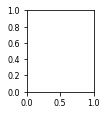

In [679]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(1.2,1.5))

output1 = np.load('data/output1.npy')
output2 = np.load('data/output2.npy')
output3 = np.load('data/output6.npy')
output4 = np.load('data/output3.npy')
output5 = np.load('data/output4.npy')
output6 = np.load('data/output5.npy')

def filter_outliers(data, lower_percentile=0.1, upper_percentile=99.9):
    lower = np.percentile(data, lower_percentile)
    upper = np.percentile(data, upper_percentile)
    return data[(data >= lower) & (data <= upper)]

# data_list = [filter_outliers(output1), filter_outliers(output2), filter_outliers(output3), filter_outliers(output4), filter_outliers(output5), filter_outliers(output6)]
data_list = [output1, output2, output3, output4, output5, output6]
counts = []
res = []

for output in data_list:
    count = np.sum(((output >= -2) & (output <= -1)) | ((output >= 1) & (output <= 2)))
    counts.append(count)
    
    percentage = round((count / len(output)) * 100, 2)
    # print(f"Total values: {len(output)}")
    # print(f"Values in range: {count}")
    # print(f"Percentage: {percentage:.2f}%\n")
    res.append(percentage)
res

labels = ['FC2', 'FC1', 'OUT', 'V', 'K', 'Q']
bar_width = 1.0
x = np.arange(len(data)) * (bar_width * 2) 

plt.barh(x, res, edgecolor='black', linewidth=0.5, color='darkseagreen',)
plt.xlabel('Percentage (%)')
plt.ylabel('Layers')
plt.yticks(x, labels)
plt.xlim(0, 48)
# plt.bar_label(plt.gca().containers[0], fontsize = 9)
for i in [0, 2, 3]:  # This will label only bars A, B, and C
    bar = plt.barh(x, res)[i]
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}',
             va='center')
plt.savefig('figs/fig10_right.pdf',dpi=100,bbox_inches = 'tight')
plt.show()

## Fig 11 Boxplot

In [44]:
import gc

gc.collect()

30723

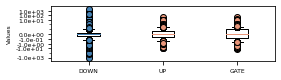

In [130]:
plt.rcParams.update({'font.size': 6})
# plt.figure(figsize=(3.5,1.5))
plt.figure(figsize=(4,1))

data_down = np.load('data/boxplotdown.npy')
# filtered_down = data_down[(data_down > 1) | (data_down <-1)]
data_up = np.load('data/boxplotup.npy')
# filtered_up = data_up[(data_up > 1) | (data_up <-1)]
data_gate = np.load('data/boxplotgate.npy')
# filtered_gate = data_gate[(data_gate > 1) | (data_gate <-1)]

x_down = [-2] * len(data_down)
x_gate = [0] * len(data_gate)
x_up = [2] * len(data_up)
test_value = [0.1] * len(data_up)

colors = ['#4682B4', 'darksalmon', 'darksalmon']

box_plot = plt.boxplot([data_down, data_up, data_gate], 
                      labels=['DOWN', 'UP', 'GATE'])

for i, (flier, color) in enumerate(zip(box_plot['fliers'], colors)):
    flier.set_markerfacecolor(color)
    flier.set_markeredgecolor('black')
    
    box_plot['medians'][i].set_color(color)

plt.ylabel('Values')
plt.yticks([])
plt.yscale('symlog', linthresh=0.1)
yticks = [-1000, -10, -1, -0.1, 0, 10, 100, 1000,]
plt.yticks(yticks, [f'{tick:.1e}' for tick in yticks])
plt.savefig('figs/fig11_boxplot.png', dpi=300,bbox_inches = 'tight')
# plt.yscale('log')
# plt.ylim(-1000, 1000)
# plt.savefig('figs/fig11_log.pdf', dpi=300,bbox_inches = 'tight')
# plt.close()
plt.show()

In [85]:
data_up
print(len(data_up[(data_up > 1) | (data_up <-1)]))
print(len(data_gate[(data_gate > 1) | (data_gate <-1)]))
print(len(data_down[(data_down > 1) | (data_down <-1)]))

10446
46547
19656


In [69]:
filtered = data[(data > 0.0) | (data <-100)]
len(filtered)

716

In [70]:
data_down

array([ 0.3252  , -0.82    ,  0.001433, ..., -0.03177 , -0.02306 ,
        0.0092  ], dtype=float16)